In [1]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("GLM")
Pkg.add("Plots")
Pkg.add("StatsBase")

   Resolving package versions...
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\ASUS\.julia\environments\v1.11\Manifest.toml`



=== Modelo 1: Y ~ X ===
Coeficiente X: 1.5184
Error estándar: 0.0575
IC 99%: [1.3699, 1.6668]

=== Modelo 2: Y ~ X + Z ===
Coeficiente X: 0.7864
Error estándar: 0.0333
IC 99%: [0.7005, 0.8724]


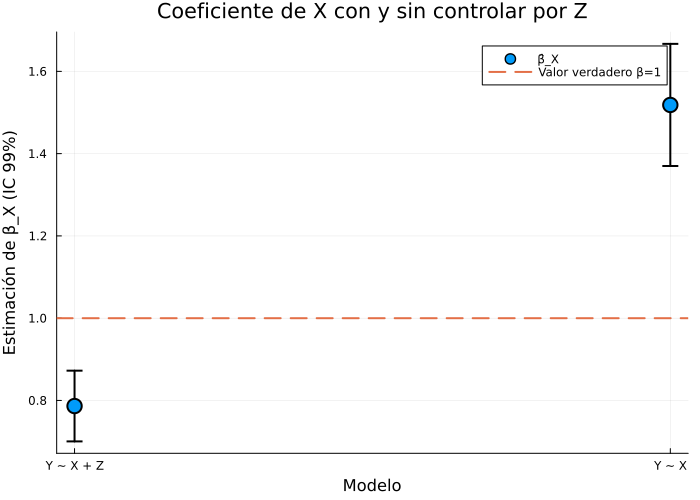



=== PARTE 2: Z afecta a X ===

Y ~ X
  β_X = 1.733
  SE = 0.0213

Y ~ X + Z
  β_X = 0.8169
  SE = 0.0312

Y ~ X + U1
  β_X = 2.0402
  SE = 0.0307

Y ~ X + U2
  β_X = 1.5274
  SE = 0.0158

Y ~ X + Z + U1
  β_X = 1.0498
  SE = 0.0388

Y ~ X + Z + U2
  β_X = 1.007
  SE = 0.0266

Y ~ X + U1 + U2
  β_X = 1.5375
  SE = 0.0287

Y ~ X + Z + U1 + U2
  β_X = 1.023
  SE = 0.0328


=== TABLA DE RESULTADOS ===
8×3 DataFrame
 Row │ Modelo               Coef_X    SE_X      
     │ String               Float64   Float64   
─────┼──────────────────────────────────────────
   1 │ Y ~ X                1.73297   0.0213449
   2 │ Y ~ X + Z            0.816948  0.0312329
   3 │ Y ~ X + U1           2.04025   0.030725
   4 │ Y ~ X + U2           1.52744   0.0157913
   5 │ Y ~ X + Z + U1       1.04983   0.0388005
   6 │ Y ~ X + Z + U2       1.007     0.0265962
   7 │ Y ~ X + U1 + U2      1.53751   0.0286641
   8 │ Y ~ X + Z + U1 + U2  1.02303   0.0327857


=== CONCLUSIONES ===
El mejor modelo es aquel que i

In [3]:
### Librerías necesarias
using Random
using DataFrames
using GLM
using Statistics
using Plots
using StatsBase
using Distributions  ### ¡Agregar esta línea!

### Configurar semilla para reproducibilidad
Random.seed!(42)

### ============================================================================
### PARTE 1: Simulación del Ejemplo 4 de la PD
### ============================================================================

### Generar muestra aleatoria (0.1% de la población)
n_total = 1_000_000
sample_prob = 0.001
sample_indices = findall(rand(n_total) .< sample_prob)

### Generar variables de confusión U1 y U2
pop_U1 = randn(n_total)
pop_U2 = randn(n_total)

### Generar Z (depende de U1 y U2)
pop_Z = pop_U1 .+ pop_U2 .+ randn(n_total)

### Generar X (depende de U1)
pop_X = pop_U1 .+ randn(n_total)

### Generar Y (depende de X, U2 y Z)
pop_Y = pop_X .+ pop_U2 .+ pop_Z .+ randn(n_total)

### ============================================================================
### PARTE 1: Regresión controlando y no controlando por Z
### ============================================================================

### Crear DataFrame con la muestra
df_sample = DataFrame(
    X = pop_X[sample_indices],
    Z = pop_Z[sample_indices],
    Y = pop_Y[sample_indices]
)

### Modelo 1: Y ~ X (sin controlar por Z)
model1 = lm(@formula(Y ~ X), df_sample)
b1 = coef(model1)[2]  ### Coeficiente de X
se1 = stderror(model1)[2]  ### Error estándar de X

### Calcular intervalo de confianza al 99%
tcrit1 = quantile(TDist(dof_residual(model1)), 0.995)
lo1 = b1 - tcrit1 * se1
hi1 = b1 + tcrit1 * se1

println("\n=== Modelo 1: Y ~ X ===")
println("Coeficiente X: ", round(b1, digits=4))
println("Error estándar: ", round(se1, digits=4))
println("IC 99%: [", round(lo1, digits=4), ", ", round(hi1, digits=4), "]")

### Modelo 2: Y ~ X + Z (controlando por Z)
model2 = lm(@formula(Y ~ X + Z), df_sample)
b2 = coef(model2)[2]  ### Coeficiente de X
se2 = stderror(model2)[2]  ### Error estándar de X

### Calcular intervalo de confianza al 99%
tcrit2 = quantile(TDist(dof_residual(model2)), 0.995)
lo2 = b2 - tcrit2 * se2
hi2 = b2 + tcrit2 * se2

println("\n=== Modelo 2: Y ~ X + Z ===")
println("Coeficiente X: ", round(b2, digits=4))
println("Error estándar: ", round(se2, digits=4))
println("IC 99%: [", round(lo2, digits=4), ", ", round(hi2, digits=4), "]")

### ============================================================================
### Graficar con intervalos de confianza
### ============================================================================

labels = ["Y ~ X + Z", "Y ~ X"]
betas = [b2, b1]
yerr_low = [b2 - lo2, b1 - lo1]
yerr_high = [hi2 - b2, hi1 - b1]

p = scatter(1:2, betas, 
    yerr = (yerr_low, yerr_high),
    label = "β̂_X",
    xlabel = "Modelo",
    ylabel = "Estimación de β_X (IC 99%)",
    title = "Coeficiente de X con y sin controlar por Z",
    xticks = (1:2, labels),
    legend = :topright,
    markersize = 8,
    markerstrokewidth = 2,
    grid = true,
    size = (700, 500))

hline!([1.0], label = "Valor verdadero β=1", linestyle = :dash, linewidth = 2)

display(p)

### ============================================================================
### PARTE 2: Ahora Z afecta X
### ============================================================================

println("\n\n=== PARTE 2: Z afecta a X ===")

### Regenerar variables con nueva estructura causal
pop_U1_2 = randn(n_total)
pop_U2_2 = randn(n_total)

### Z depende de U1 y U2
pop_Z_2 = pop_U1_2 .+ pop_U2_2 .+ randn(n_total)

### X ahora depende de U1 y Z
pop_X_2 = pop_U1_2 .+ pop_Z_2 .+ randn(n_total)

### Y depende de X, U2 y Z
pop_Y_2 = pop_X_2 .+ pop_U2_2 .+ pop_Z_2 .+ randn(n_total)

### Crear DataFrame con todas las variables
df_full = DataFrame(
    X = pop_X_2[sample_indices],
    Z = pop_Z_2[sample_indices],
    U1 = pop_U1_2[sample_indices],
    U2 = pop_U2_2[sample_indices],
    Y = pop_Y_2[sample_indices]
)

### ============================================================================
### Probar 8 combinaciones de modelos
### ============================================================================

### Lista para almacenar resultados
resultados = DataFrame(
    Modelo = String[],
    Coef_X = Float64[],
    SE_X = Float64[]
)

### Función auxiliar para ajustar modelo y extraer resultados
function fit_and_extract(formula, data, nombre)
    model = lm(formula, data)
    coef_x = coef(model)[2]  ### Coeficiente de X (segundo parámetro)
    se_x = stderror(model)[2]
    push!(resultados, (nombre, coef_x, se_x))
    println("\n$nombre")
    println("  β_X = ", round(coef_x, digits=4))
    println("  SE = ", round(se_x, digits=4))
end

### 1) Y ~ X
fit_and_extract(@formula(Y ~ X), df_full, "Y ~ X")

### 2) Y ~ X + Z
fit_and_extract(@formula(Y ~ X + Z), df_full, "Y ~ X + Z")

### 3) Y ~ X + U1
fit_and_extract(@formula(Y ~ X + U1), df_full, "Y ~ X + U1")

### 4) Y ~ X + U2
fit_and_extract(@formula(Y ~ X + U2), df_full, "Y ~ X + U2")

### 5) Y ~ X + Z + U1
fit_and_extract(@formula(Y ~ X + Z + U1), df_full, "Y ~ X + Z + U1")

### 6) Y ~ X + Z + U2
fit_and_extract(@formula(Y ~ X + Z + U2), df_full, "Y ~ X + Z + U2")

### 7) Y ~ X + U1 + U2
fit_and_extract(@formula(Y ~ X + U1 + U2), df_full, "Y ~ X + U1 + U2")

### 8) Y ~ X + Z + U1 + U2
fit_and_extract(@formula(Y ~ X + Z + U1 + U2), df_full, "Y ~ X + Z + U1 + U2")

### Mostrar tabla de resultados
println("\n\n=== TABLA DE RESULTADOS ===")
println(resultados)

### ============================================================================
### CONCLUSIONES
### ============================================================================

println("\n\n=== CONCLUSIONES ===")
println("El mejor modelo es aquel que incluye Z + U1 o Z + U2")
println("El valor verdadero del efecto causal es β = 1.0")
println("El conjunto mínimo suficiente de controles es: Z + (U1 o U2)")